# Домашнее задание 1 (NumPy, Pandas, Matplotlib)

## Общая информация
**Дата выдачи**: 31.01.2018

**Срок сдачи**: 23:59 13.02.2018

**О задании**

Домашнее задание №1 ориентировано на более тесное знакомство с модулями NumPy, Pandas и Matplotlib путём решения набора задач. Целью задания является редактирование данного ipython notebook'a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

**Оценивание и штрафы**

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи), оценка за задание выставляется следующим образом:
Оценка за задание = Сумма баллов за решенные задачи/3

Таким образом, максимально допустимая оценка за задание — 10 баллов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.2 балла в день, но получить отрицательное число баллов нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется **САМОСТОЯТЕЛЬНО**. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

**Формат сдачи**

Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: HW1_Username.ipynb, где Username — Ваша фамилия на латинице. Далее отправьте этот файл на почту курса ( hse.minor.dm+<номер группы>@gmail.com, указав в теме письма "[ИАД-1] Задание N, ФИО")



## Инструкция по установке на Windows:

Для установки всех необходимых библиотек на windows рекомендуется поставить дистрибутив Anaconda. Для этого нужно
просто скачать необходимую версия с официального сайта https://www.continuum.io/downloads (мы рекомендуем ставить
python версии 3.x). После установки дистрибутива необходимо запустить командную строку (для этого можно нажать win+R и набрать команду cmd). Затем, для запуска ipython notebook'а достаточно просто написать ipython notebook в
командной строке, и у вашем браузере откроется стандартная страничка, которую вы уже много раз видели, используя
виртуальную машину.

## Инструкция по установке на Linux/Mac OS:

Под Linux и Mac OS также доступен дистрибутив Anaconda, который можно скачать с https://www.continuum.io/downloads.
Дальше опять же вам нужно открыть терминал и набрать там команду ipython notebook (либо возможно ipython3
notebook).

Если же вам по каким-либо причинам не хочется ставить Anaconda (например, вы не хотите, чтобы у вас появлялась еще
одна версия python и были возможные конфликты путей, или вы просто чувствуете в себе Силу и хотите все поставить
сами), то можно установить все необходимые библиотеки напрямую. Для этого выполните в терминале следующие две
команды:

```bash
sudo apt-get install -y build-essential python3-numpy python3-scipy python3-matplotlib ipython3 
ipython3-notebook python3-pandas python3-sympy python3-nose python3-pip swig

sudo pip3 install cython scikit-image scikit-learn jupyter
```
Для Mac OS в первой команде нужно заменить apt-get на brew (если у вас стоит пакетный менеджер homebrew, если нет,
его нужно предварительно установить). Если вы хотите использовать python версии 2.x, то во всех командах выше
необходимо убрать цифру 3. То есть, например, писать не python3-numpy, а python-numpy, или не pip3 install, а pip
install.
    
Также, можно воспользоваться инструкциями, описанными здесь:
http://www.machinelearning.ru/wiki/images/1/10/MMP_Praktikum_317_2014a_Python.pdf

Установка Python и всех необходимых модулей не является обязательной для сдачи данного задания.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## NumPy

При решении задач запрещено использовать циклы. Обратите внимание на функции и методы np.max, np.min, np.arange, np.hstack, np.roll, np.random.uniform, np.random.rand, np.newaxis.

#### 1. (1 балл) Написать функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$)

    Например, для a = np.array([4, 2, 6, 3]) и b = np.array([4, 3, 6, -3]) ответом является кортеж (4, 6).

In [2]:
def minMaxEqual(a, b):
    try: 
        return (np.min(a[a==b]), np.max(a[a==b]))
    except ValueError:
        return 'No similar numbers'

#### 2. (2 балла) Дан numpy-вектор v длины n+1, который задает полином степени n. Найти вторую производную этого полинома (Например np.array([3, 0, 7, 1]) соответствует полиному 3+7x^2+x^3)

    Для вектора из примера функция должна будет выдавать np.array([14, 6])

In [3]:
def second_derivative(v):
    powers = range(len(v)) # степени, которые умножаются на коэффициент после взятия производной 
    v = np.delete(powers * v , 0) # уменьшаем степень полинома на 1
    if len(v)>=2:
        powers = range(len(v))
        v = np.delete(powers * v , 0)
    else:
        return np.array([0])
    return v

#### 3. (1 балл) Дана матрица X и два вектора одинаковой длины i и j. Написать функцию, которая возвращает вектор np.array, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]$. 

In [4]:
def constructArray(X, i, j):
    return X[(i,j)]

#### 4. (2 балла) Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

    Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [5]:
def prevZeroMax(x):
    zero_indices = np.where(x==0)[0]
    if zero_indices[-1] == len(x) - 1:
        zero_indices = np.delete(zero_indices, -1)
    return np.max(x[zero_indices+1])

#### 5. (2 балла) Напишите функцию, которая принимает параметры lims: ndarray размера 2, k: float, b: float, n: int, noise_level: float и возвращает выборку из n объектов, сгенерированную по правилу y = kx + b + U[-noise_level; noise_level]. x генерируется равномерно из U[lims[0]; lims[1]] (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [6]:
def gen_data(lims, k, b, n, noise_level): #в расчете на то, что lims - np.array, не очень понял зачем нужный многомерный array,
                                          #как указано в задании
    x = np.random.uniform(lims[0],lims[1], n)
    noise = np.random.uniform(-noise_level, noise_level,n) 
    y = k * x + b + noise
    return (x,y)

#### 6. (2 балла) Напишите функцию, которая вычисляет следующее матричное произведение: $x * x.T + a * I + b$. Здесь x и b — массивы np.array размерности N (одномерные, считаются вектор-столбцом). a — число, I — матрица, состоящая единиц на главной диагонали и нулей в остальных местах (единичная матрица). Сложение вектора b с матрицей x * x.T должно осуществляться по столбцам (вектор b должен прибавиться к каждому столбцу матрицы независимо).

    Например, для x = np.array([[1],[2],[3]]), b = np.array([[0], [-2], [1]]), a = 4.5 функция должна выдавать 
    np.array([[5.5, 2.0, 3.0], [0.0, 6.5, 4.0], [4.0, 7.0, 14.5]])
$x*x.T$ - матричное произведение

In [7]:
def calc_value(x, b, a):
    return x.dot(x.T) + a * np.eye(x.shape[0]) + b

## Pandas


Вам предстоит ответить на ряд вопросов о пассажирах Титаника.

Данные: http://www.machinelearning.ru/wiki/images/3/32/Titanic.zip

Описание датасета: https://www.kaggle.com/c/titanic/data

Обратите внимание на функции и методы pd.read_csv, pd.DataFrame{ .head, .shape, .groupby, .fillna }, pd.Series{ .min, .max, .mean, .shape, .std, .corr }

#### 0. (0.5 балла) Загрузите данные в DataFrame и выведите его. Также напечатайте количество объектов и количество признаков (используйте функцию print):

In [8]:
data = pd.read_csv('train.csv')
print('Количество объектов: ', data.shape[0], '\nКоличество признаков: ', len(data.columns))

Количество объектов:  891 
Количество признаков:  12


#### 1. (0.5 балла) Какие встречаются типы признаков? Придумайте постановку трех задач, которые можно решать, используя полученные данные: классификации, регрессии и кластеризации.

Признаки бывают категориальные (которые, в свою очередь, часто разделяют на бинарные и множественные) и количественные. Признаки первого типа описывают дискретные и счетные величины, т.е ими пользуются в тех случаях, когда категории можно сосчитать и пронумеровать целыми числами (например, категориальным признаком может быть пол - мужской/женский). Второй тип признаков описывает величины, которые принимают значения на всей числовой оси. К примеру, это может быть температура в определенный момент дня.

Задачи, которые можно решать:

* Классификация - Предсказать, выжил человек, или нет.
* Регрессия - Предсказать, каков возраст человека с указанными данными.
* Кластеризация - выделить кластеры среди выживших (к примеру, богатый человек без детей, многодетная женщина и т.д)

#### 2. (0.5 балла) Сохраните в переменную firstclass_num количество пассажиров, которые ехали первым классом, и выведите ее с помощью функции print().

In [9]:
firstclass_num = data[data['Pclass'] == 1].shape[0]
print(firstclass_num)

216


#### 3. (0.5 балла) Выведите минимальный, максимальный и средний возраст пассажиров.

In [10]:
print(f"Min: {data['Age'].min()}, Max: {data['Age'].max()}, Mean: {data['Age'].mean()}")

Min: 0.42, Max: 80.0, Mean: 29.69911764705882


#### 4. (1 балл) Напечатайте стандартное отклонение цены билетов на Титаник

In [11]:
print(data['Fare'].std())

49.693428597180905


#### 5. (1 балл) Посчитайте коэффициент корреляции ценой на билет и возрастом пассажиров.

In [12]:
print(0.096067)
data[['Fare', 'Age']].corr()

0.096067


,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


#### 6. (2 балла) Создайте DataFrame в котором будет находиться средний возраст выживших пассажиров по каждому классу. Ваш код должен быть масштабируемым (то есть, должен работать при добавлении новых классов к исходному DataFrame'у).

In [13]:
aver_age = pd.DataFrame(data[data['Survived'] ==1 ].groupby('Pclass')['Age'].mean())
print(aver_age)

              Age
Pclass           
1       35.368197
2       25.901566
3       20.646118


#### 7. (2 балла) Посчитайте какой части пассажиров удалось выжить. Посчитайте отношение количества выживших мужчин к количеству выживших женщинам.

In [14]:
women_to_men = len(data[(data['Survived'] == 1) & (data['Sex'] == 'male')]) / \
len(data[(data['Survived'] == 1) & (data['Sex'] == 'female')])


print('Доля выживших: ', data['Survived'].mean())
print('Отношение кол-ва выживших мужчин к женщинам: ', women_to_men)

Доля выживших:  0.3838383838383838
Отношение кол-ва выживших мужчин к женщинам:  0.4678111587982833


#### 8. (1 балл) Верно ли, что чаще выживали пассажиры с более дорогими билетами? Кратко опишите в комментариях к коду, какие величины вы хотите посчитать, чтобы ответить на этот вопрос.

In [15]:
# Я хочу посчитать среднее значение признака Survived в каждом классе билетов.
# Признак бинарный => среднее покажет долю выживших
print(data.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## **Верно**

#### 9. (1 балл) Замените все NaN в колонке Age на средние значения возраста по всем пассажирам.

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

## Matplotlib

Обратите внимание, что за отсутствие названий графиков и подписей к осям могут снижаться баллы! Вообще, все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

Обратите внимание на функции и методы plt.plot, plt.scatter, plt.legend, plt.title, plt.xlabel, plt.ylabel, plt.fill_between

#### 1. (3 балла) Используя функцию из задания №5 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_
        

In [17]:
from sklearn.linear_model import LinearRegression as LR

lims = np.array([-4, 4])
k = 2
b = 3
n = 50
noise_level = 4

data_x, data_y = gen_data(lims,k,b,n,noise_level)
regr = LR()
regr.fit(data_x.reshape(-1,1), data_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

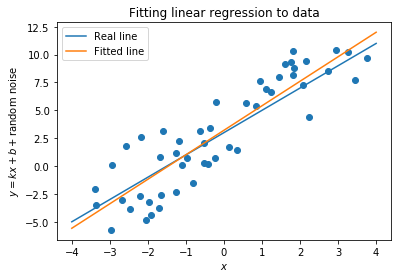

In [18]:
k_learned, b_learned = regr.coef_, regr.intercept_
x = np.linspace(-4,4,50)
y = k*x + b
y_learned = k_learned * x + b_learned

plt.figure(figsize=(6,4))
plt.scatter(data_x, data_y)
plt.plot(x, y, label = 'Real line')
plt.plot(x, y_learned, label = 'Fitted line')

plt.xlabel('$x$')
plt.ylabel('$y = kx + b + $random noise')
plt.title('Fitting linear regression to data')
plt.legend();

#### 2. (2 балла) Проверьте визуально полученную при выполнении задания №5 по pandas информацию о корреляции между ценой на билет и возрастом пассажира. Для этого предлагается отобразить все данные, откладывая на одной оси возраст пассажира, а на другой цену билета. Каждая точка должна быть визуально оботражена в виде треугольника зеленого цвета, направленного вниз. Сделайте возможность регулировать величину маркера (например, пусть она передается в качестве параметра в функцию, которая рисует график). Обратите внимание на параметры "marker", "s" и "c" функции plt.scatter.

Text(0.5,1,'Correlation between age and fare')

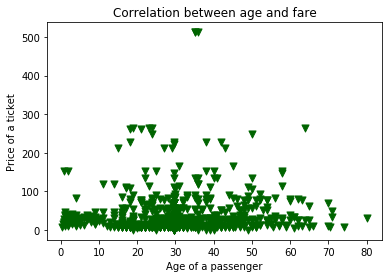

In [19]:
marker_size = 50

plt.scatter(data['Age'], data['Fare'], c='darkgreen', s = marker_size, marker='v')

plt.xlabel('Age of a passenger')
plt.ylabel('Price of a ticket')
plt.title('Correlation between age and fare')

#### 3. (3 балла) Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

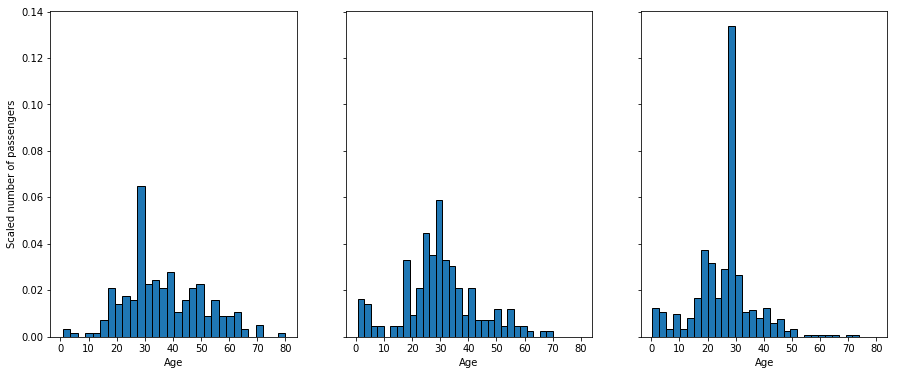

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex = True, figsize=(15,6));
ax1.set_xticks(np.arange(0,90,10))
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Scaled number of passengers')
ax1.hist(data[data['Pclass'] == 1]['Age'], normed=True, bins=30, edgecolor='black');
ax2.hist(data[data['Pclass'] == 2]['Age'], normed=True, bins=30, edgecolor='black');
ax3.hist(data[data['Pclass'] == 3]['Age'], normed=True, bins=30, edgecolor='black');


#### 4. (2 балла) Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].

        def gen_uncertain_data():
            x = np.linspace(0, 30, 100)
            y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
            error = np.random.normal(0.1, 0.02, size=y.shape)
            return x, y, error


In [21]:
def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

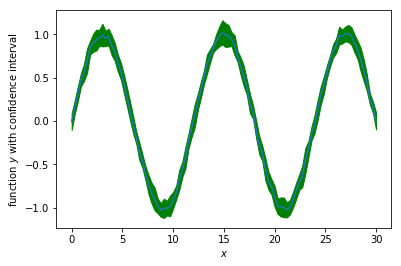

In [22]:
x, y, error = gen_uncertain_data()
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('function $y$ with confidence interval')
plt.fill_between(x, y+error, y-error, color='green')